<a href="https://colab.research.google.com/github/nurimammasri/Wooky-Numpy/blob/main/Plot%20Digits%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
%matplotlib inline


# Recognizing hand-written digits


An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
`tutorial section of the user manual <introduction>`.




Automatically created module for IPython interactive environment
Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899

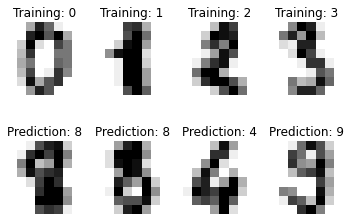

In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

Di bawah ini akan dijelaskan masing-masing bagian dari kodenya.

Berikut adalah kode python untuk **import** dari library **matplotlib**, **sklearn**, **numpy**

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# Import numpy to process matrix and vector
import numpy as np

print('import library done:')
print('{}'.format(plt))
print('{}'.format(datasets))
print('{}'.format(svm))
print('{}'.format(np))

import library done:
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>
<module 'sklearn.datasets' from '/usr/local/lib/python3.7/dist-packages/sklearn/datasets/__init__.py'>
<module 'sklearn.svm' from '/usr/local/lib/python3.7/dist-packages/sklearn/svm/__init__.py'>
<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'>


Berikut ini menggunakan **dataset digits** (MNIST),
kemudian menampilkan sejumlah informasi dari dataset tersebut menggunakan **numpy**.

**np.shape**() akan menginformasikan dimensi dari matrix.

**digits.data** berisi informasi 1797 baris, 64 kolom, yang artinya ada 1797 data dalam dataset ini, setiap data berisikan 64 angka yang merepresentasikan grayscale pixel dari gambar 8x8.

**digits.target** adalah data target (label) dari 1797 untuk proses training (latih).

**digits.images** adalah data gambar, berisi vektor 3 dimensi: 1797 data, setiap gambar berisi 8x8 (8 baris, 8 kolom) sesuai dengan gambar angka 8x8 pixels

tanda **...** artinya ada data di antara awal dan akhir yang tidak dimunculkan.


In [ ]:
# The digits dataset
digits = datasets.load_digits()

print('\ndigits.data: {}\n{}'.format(np.shape(digits.data), digits.data))

print('\ndigits.target: {}\n{}'.format(np.shape(digits.target), digits.target))

print('\ndigits.images: {}\n{}'.format(np.shape(digits.images), digits.images))



digits.data: (1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

digits.target: (1797,)
[0 1 2 ... 8 9 8]

digits.images: (1797, 8, 8)
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 

Berikut kita coba lihat contoh 1 data, dari **data.target** dan **data.images**.

Kita ambil index ke 0.

terlihat bahwa contoh **target[0]** adalah angka 0.

kemudian kita tampilkan data representasi dari gambar ke 0 atau **images[0]**, terlihat ada dimensinya 8x8. berisi angka-angka 0 sampai 15.

**angka 0** akan menampilkan pixel warna (paling) putih

**angka 15** akan menampilkan pixel warna (paling) hitam

dan baris terakhir melakukan plot gambar dengan **plt.imshow** dari **images[0]** agar kita dapat melihat langsung gambarnya, jadi tidak hanya membayangkan dari matrix datanya.

di sini terlihat bahwa gambar, direpresentasikan sebagai matrix, dengan warna grayscale yang dibagi dalam 16 tingkatan. (0-15).


target[0]: 0
images[0]: (8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


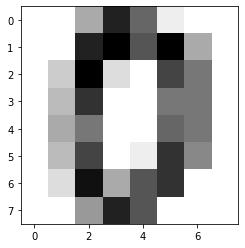

In [ ]:
print('target[0]: {}'.format(digits.target[0]))

print('images[0]: {}\n{}'.format(np.shape(digits.images[0]), digits.images[0]))

plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

Berikut contoh dari kode untuk menampilkan gambar dan label secara pasangan dalam 4 gambar sekaligus (dilihat dari **[:4]**).

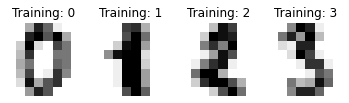

In [ ]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

Untuk melakukan klasifikasi dari data ini, perlu dilakukan **flatten** dari representasi gambar 8x8 menjadi 1x64.

Proses **flatten** dilakukan dengan fungsi **reshape()**

proses **reshape** akan mengubah dimensi dari 1797x8x8 menjadi 1797x64,
sehingga matrix 3 dimensi diubah menjadi matrix 2 dimensi.


In [ ]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print(np.shape(digits.images))
print('n_samples: {}'.format(n_samples))
print(np.shape(data))
print('\ndata[0]: \n{}\n'.format(data[0]))


(1797, 8, 8)
n_samples: 1797
(1797, 64)

data[0]: 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]



Untuk percobaan kali ini, datanya akan dibagi 2, untuk memudahkan kita bagi rata (50-50).

jadi **n_samples // 2**

kemudian proses training (latih) akan mempelajari dari setengah data awal (dilihat dari **[:n_samples // 2]**).


In [ ]:
print('n_samples // 2: {}'.format(n_samples // 2))


n_samples // 2: 898


Kita akan menggunakan sistem klasifikasi SVM atau disebut Support-Vector Classifier,
dengan nilai gamma sebesar 0.001.

lihat referensi berikut untuk parameter dari nilai gamma (dan parameter lain).
https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

![High Gamma](https://miro.medium.com/max/1200/1*dGDQxV8j83VB90skHsXktw.png)

![Low Gamma](https://miro.medium.com/max/1200/1*ClmsnU_yb1YtIwAAr7krmg.png)

Saat ini kita mengisikan data gamma nya secara manual, tapi ada tools seperti grid search dan cross validation yang dapat membantu mencari nilai yang tepat.

In [ ]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Setelah selesai melakukan proses latih, kita akan melakukan proses uji, dengan menggunakan setengah data akhir (terlihat dari **[n_samples // 2]**).

data yang sudah kita punya (dengan label, atau data yang benar) kita masukkan dalam **expected**.

kemudian dengan classifier yang sudah dilatih, kita melakukan prediksi (uji), hasil prediksinya kita masukkan dalam **predicted**

untuk menghitung skor ketepatannya, kita menggunakan **accuracy_score** untuk membandingkan antara expected dengan predicted.



In [ ]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print('Accuracy score: {}\n'.format(metrics.accuracy_score(expected, predicted)))

# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

print("Classification report for classifier %s:\n\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

# https://stackoverflow.com/questions/30746460/how-to-interpret-scikits-learn-confusion-matrix-and-classification-report

print("\nConfusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))


Accuracy score: 0.9688542825361512

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97    

Cara membaca confusion matrix untuk multi values classifier.
diambil contoh **baris pertama** untuk data dengan **label** (nilai benar, actual) **0**

di baris pertama ini nilai total adalah 88 (dari: 87 + 1),

maka prediksi yang benar untuk **label 0** adalah 87/88 sekitar 99% .. data ini disebut **recall**

kemudian melihat **kolom pertama** yaitu untuk **prediksi 0** di sini classifier mendapatkan presisi 87/87 yaitu 100%.

sekarang kita lihat **kolom sepuluh** yaitu untuk **prediksi 9** di sini classifier mendapatkan presisi 90/97 sekitar 93%, terlihat bahwa ada 4 data yang **harusnya diprediksi sebagai 9 ternyata angka 4**.





Berikut kita tampilkan data dari gambar dan hasil prediksinya,
apakah kamu setuju dengan prediksi dari gambar ini?


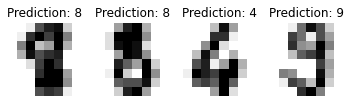

In [ ]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)